### EEG 建模(分類器)。
### 以機器學習的方法和神經網路(Neural Network)的方式。

In [1]:
# 匯入相關的套件、模組
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Get_file import Get_file   # return dirpath, dirnames, filenames
from FFT import FFT, PlotDataOnTimeDomain
from BandPassFilter import BandPassFilter, PlotDataOnFreqDomain, BandPassListFilter
from Danny_ML_CLF import Danny_ML_CLF
import os

%matplotlib inline

data_dir = "C:\\Users\\zxpay\\Desktop\\BME_Senior\\EEG_CLF\\Emotion\\database\\New_SDK_Data"


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# 此 function 會去計算 Array中有幾個 0 的值
def CalculateZeros(NumpyArray):
    LogicWithZeros = (NumpyArray == 0)
    return np.sum(LogicWithZeros)

# 資料愈處理

### Read the data (*.csv) using pandas

In [3]:
os.chdir(data_dir)
_,data_files,_ = Get_file(data_dir)
data_files
all_df = pd.DataFrame()
for file in data_files:
    emotion = 0
    # 1->normal, 2->happy, 3->scare, 4->touch, 
    _,_,file_names = Get_file(data_dir + '\\' + file)
    for fn in file_names:
        
        data_name = data_dir + '\\' + file + '\\' + fn
        if 'happy' in fn:
            emotion = 2
        elif 'scare' in fn:
            emotion = 3
        elif 'touch' in fn:
            emotion = 4
        else:
            print(fn)
            emotion = 1
        #print(emotion, fn)
        df = pd.read_csv(data_name, engine='python')
        df_length = df.shape[0]
        
        df['label'] = df['label']*emotion
            
        try:
            all_df = pd.concat([all_df,df])
        except Exception as e:
            print(e)
            all_df = df
        #print(sorted(df.corr()['label'].tolist()), fn)
        #print('***********************************************')
        

### 移除遺失值

In [4]:
all_df = all_df.dropna(axis=1)
all_df = all_df.reset_index()

In [5]:
Columns = ['alpha', 'channel', 'gamma', 'heig_beta', 'label','low_beta','theta','time']
Features = ['alpha', 'heig_beta', 'low_beta','theta']
Labels = ['label']

### 區分每個 Channel，每個 channel都訓練，以探討頭腦哪一區塊對於情緒有較大的相關性。

In [6]:
channel1 = all_df[all_df['channel'] == 1].index
channel2 = all_df[all_df['channel'] == 2].index
channel3 = all_df[all_df['channel'] == 3].index
channel4 = all_df[all_df['channel'] == 4].index
channel5 = all_df[all_df['channel'] == 5].index
channel6 = all_df[all_df['channel'] == 6].index
channel7 = all_df[all_df['channel'] == 7].index
channel8 = all_df[all_df['channel'] == 8].index
channel9 = all_df[all_df['channel'] == 9].index
channel10 = all_df[all_df['channel'] == 10].index
channel11 = all_df[all_df['channel'] == 11].index
channel12 = all_df[all_df['channel'] == 12].index
channel13 = all_df[all_df['channel'] == 13].index
channel14 = all_df[all_df['channel'] == 14].index

df_1 = all_df.iloc[channel1]
df_2 = all_df.iloc[channel2]
df_3 = all_df.iloc[channel3]
df_4 = all_df.iloc[channel4]
df_5 = all_df.iloc[channel5]
df_6 = all_df.iloc[channel6]
df_7 = all_df.iloc[channel7]
df_8 = all_df.iloc[channel8]
df_9 = all_df.iloc[channel9]
df_10 = all_df.iloc[channel10]
df_11 = all_df.iloc[channel11]
df_12 = all_df.iloc[channel12]
df_13 = all_df.iloc[channel13]
df_14 = all_df.iloc[channel14]


In [7]:
# 利用 List 去收集每個 Pandas的 DataFrame
my_df = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9,
        df_10, df_11, df_12, df_13, df_14]

# Scikit-Learn 建模與訓練資料

In [46]:
# 彙整訓練資料、標籤(label)以準備用來建模

os.chdir('C:\\Users\\zxpay\\Desktop\\BME_Senior\\EEG_CLF\\Emotion\\Code')
n = 4   # Channel 5 is the best result

#for n in range(len(my_df)):   # Run all the channel, and see what channel is best
Testing_df = my_df[n]
data = np.zeros([Testing_df.shape[0], 4])
for i in range(4):
    data[:, i] = np.array(Testing_df[Features[i]], dtype=np.float32)
label = np.array(Testing_df['label'], dtype=np.float32)
if CalculateZeros(data) != 0:
    print('Warning !!!')

pos = np.where((label==0) | (label==2))

zero_pos = np.where(label==0)
zero_choose = np.random.randint(500,20000,size=400)
zero_choose = zero_pos[0][zero_choose]
data_normal = data[zero_choose]
label_normal = label[zero_choose]

pos_happy = np.where(label==2)
one_choose = np.random.randint(20,1020,size=400)
one_choose = pos_happy[0][one_choose]
data_happy = data[one_choose]
label_happy = label[one_choose]

data_del = np.delete(data, pos, axis=0)
label_del = np.delete(label, pos)

data_all = np.vstack((data_normal, data_del))
label_all = np.hstack((label_normal, label_del))
data_all = np.vstack((data_happy, data_all))
label_all = np.hstack((label_happy, label_all))

#     print(data_all.shape)
#     print(label_all.shape)

clf = Danny_ML_CLF()
train_X, test_X, train_y, test_y = clf.Split_data(data_all, label_all, test_size=0.3, Standard=True)
clf.Fit_value(train_X, train_y)
clf.Train()
clf.Report(train_X, train_y, [0,2,3,4], show_cm=False)
clf.Report2txt('Train' + str(n+1) + '.txt')
print(clf.Score())
print()
clf.Report(test_X, test_y, [0,2,3,4], show_cm=False)
clf.Report2txt('Test' + str(n+1) + '.txt')
print(clf.Score())
print('Report Okay !\n\n')

C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.43856332703213613
Tree Score :  0.5311909262759924
Bayes Score :  0.3279773156899811
KNN Score :  1.0
XGB Score :  0.7069943289224953
Stacking Score :  0.9130434782608695
Voting Score :  0.9338374291115312
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.553875236294896
None



C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.42290748898678415
Tree Score :  0.43171806167400884
Bayes Score :  0.33259911894273125
KNN Score :  0.44273127753303965
XGB Score :  0.513215859030837
Stacking Score :  0.43171806167400884
Voting Score :  0.4933920704845815
Bagging Score :  0.5
RF Score :  0.513215859030837
Adaboost Score :  0.4779735682819383
None
Report Okay !




In [9]:
np.sum(clf.RF_prediction(test_X)==test_y)/test_y.shape[0]

0.5220264317180616

In [10]:
print(np.sum(label_all==0))
print(np.sum(label_all==2))
print(np.sum(label_all==3))
print(np.sum(label_all==4))

400
400
354
358


In [11]:
clf.RF_prediction(test_X)

array([0., 2., 4., 4., 0., 0., 4., 0., 4., 3., 3., 3., 3., 0., 4., 4., 4.,
       2., 2., 0., 3., 2., 0., 2., 4., 4., 3., 2., 4., 2., 2., 0., 2., 2.,
       4., 2., 3., 2., 3., 0., 4., 2., 3., 0., 4., 0., 2., 0., 4., 2., 2.,
       4., 4., 4., 2., 4., 3., 2., 3., 0., 4., 4., 3., 2., 4., 3., 0., 0.,
       0., 3., 4., 0., 2., 0., 3., 4., 3., 4., 3., 3., 3., 4., 2., 2., 2.,
       2., 0., 0., 2., 4., 0., 2., 0., 0., 4., 3., 0., 2., 4., 2., 3., 2.,
       2., 2., 2., 4., 0., 4., 3., 4., 4., 2., 4., 2., 0., 3., 4., 0., 4.,
       2., 2., 3., 3., 4., 0., 4., 0., 2., 2., 3., 0., 3., 0., 0., 4., 2.,
       4., 0., 3., 4., 4., 3., 3., 4., 2., 4., 2., 3., 2., 4., 3., 0., 0.,
       2., 3., 4., 4., 0., 4., 4., 2., 0., 2., 4., 4., 0., 2., 3., 0., 4.,
       2., 0., 3., 2., 2., 2., 2., 0., 2., 2., 2., 4., 4., 0., 0., 0., 0.,
       2., 3., 4., 2., 4., 4., 2., 4., 0., 2., 4., 3., 0., 4., 0., 0., 2.,
       2., 3., 4., 0., 0., 2., 2., 4., 2., 3., 2., 4., 4., 2., 2., 3., 2.,
       0., 4., 4., 4., 3.

In [12]:
from sklearn.tree import DecisionTreeClassifier
label_name = []
for x in train_y:
    if x == 0:
        label_name.append('normal')
    elif x == 2:
        label_name.append('happy')
    elif x == 3:
        label_name.append('scare')
    elif x == 4:
        label_name.append('touch')
    else:
        print(x)
label_name_test = []
for x in test_y:
    if x == 0:
        label_name_test.append('normal')
    elif x == 2:
        label_name_test.append('happy')
    elif x == 3:
        label_name_test.append('scare')
    elif x == 4:
        label_name_test.append('touch')
    else:
        print(x)
tree = DecisionTreeClassifier(criterion='gini',max_depth=3)
tree.fit(train_X, label_name)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", feature_names=['alpha', 'heig_beta', 'low_beta','theta'],\
                class_names=['normal','happy','scare', 'touch'])


In [14]:
!dot -Tpng tree.dot -o tree.png
#tree.predict(test_X)
tree.score(test_X, label_name_test)

0.460352422907489

# Save Model (Scikit-learn model)

In [47]:
# Save Scikit-Learn Model
clf.Save_Model()


In [48]:
# Read Method -- Scikit-learn model
clf_read = Danny_ML_CLF()
clf_read.Read_Model()
clf.Report(train_X, train_y, [0,2,3,4], show_cm=False)
print(clf.Score())
clf.Report(test_X, test_y, [0,2,3,4], show_cm=False)
print(clf.Score())

C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.43856332703213613
Tree Score :  0.5311909262759924
Bayes Score :  0.3279773156899811
KNN Score :  1.0
XGB Score :  0.7069943289224953
Stacking Score :  0.9130434782608695
Voting Score :  0.9338374291115312
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.553875236294896
None


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.42290748898678415
Tree Score :  0.43171806167400884
Bayes Score :  0.33259911894273125
KNN Score :  0.44273127753303965
XGB Score :  0.513215859030837
Stacking Score :  0.43171806167400884
Voting Score :  0.4933920704845815
Bagging Score :  0.5
RF Score :  0.513215859030837
Adaboost Score :  0.4779735682819383
None


# 建立 Neural Network Model to predict data

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])

#### 將 Label 經過 One-hot encoding

In [49]:
Testing_df = my_df[4]
data = np.zeros([Testing_df.shape[0], 4])
for i in range(4):
    data[:, i] = np.array(Testing_df[Features[i]], dtype=np.float32)
label = np.array(Testing_df['label'], dtype=np.float32)
if CalculateZeros(data) != 0:
    print('Warning !!!')

pos = np.where((label==0) | (label==2))

zero_pos = np.where(label==0)
zero_choose = np.random.randint(500,20000,size=400)
zero_choose = zero_pos[0][zero_choose]
data_normal = data[zero_choose]
label_normal = label[zero_choose]

pos_happy = np.where(label==2)
one_choose = np.random.randint(20,1020,size=400)
one_choose = pos_happy[0][one_choose]
data_happy = data[one_choose]
label_happy = label[one_choose]

data_del = np.delete(data, pos, axis=0)
label_del = np.delete(label, pos)

data_all = np.vstack((data_normal, data_del))
label_all = np.hstack((label_normal, label_del))
data_all = np.vstack((data_happy, data_all))
label_all = np.hstack((label_happy, label_all))


from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
label_onehot = one.fit_transform(label_all.reshape(-1,1)).toarray()
train_X, test_X, train_y, test_y = clf.Split_data(data_all, label_onehot, test_size=0.25, Standard=True)
train_y.shape

(1134, 4)

### 建模，訓練資料與評估

In [136]:
from keras.callbacks import EarlyStopping
#patience:number of epochs with no improvement after which training will be stopped.
#earlyStopping=EarlyStopping(monitor='val_loss', patience=15) 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
model = Sequential()
model.add(Dense(128, input_dim=4, kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(32, kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('softmax'))

In [137]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(train_X, train_y, epochs=100, batch_size=100, verbose=1,)

Epoch 1/100
1134/1134 [==============================] - 2s 2ms/step - loss: 1.4249 - acc: 0.3298
Epoch 2/100
1134/1134 [==============================] - 0s 95us/step - loss: 1.3143 - acc: 0.3862
Epoch 3/100
1134/1134 [==============================] - 0s 84us/step - loss: 1.3016 - acc: 0.3907
Epoch 4/100
1134/1134 [==============================] - 0s 88us/step - loss: 1.2687 - acc: 0.4171
Epoch 5/100
1134/1134 [==============================] - 0s 92us/step - loss: 1.2666 - acc: 0.4118
Epoch 6/100
1134/1134 [==============================] - 0s 87us/step - loss: 1.2423 - acc: 0.3977
Epoch 7/100
1134/1134 [==============================] - 0s 92us/step - loss: 1.2351 - acc: 0.3898
Epoch 8/100
1134/1134 [==============================] - 0s 103us/step - loss: 1.2344 - acc: 0.4295
Epoch 9/100
1134/1134 [==============================] - 0s 94us/step - loss: 1.2351 - acc: 0.4295
Epoch 10/100
1134/1134 [==============================] - 0s 92us/step - loss: 1.2180 - acc: 0.4250
Epoch 11/

1134/1134 [==============================] - 0s 93us/step - loss: 1.1413 - acc: 0.4824
Epoch 83/100
1134/1134 [==============================] - 0s 91us/step - loss: 1.1521 - acc: 0.4656
Epoch 84/100
1134/1134 [==============================] - 0s 84us/step - loss: 1.1397 - acc: 0.4903
Epoch 85/100
1134/1134 [==============================] - 0s 82us/step - loss: 1.1417 - acc: 0.4762
Epoch 86/100
1134/1134 [==============================] - 0s 86us/step - loss: 1.1407 - acc: 0.4780
Epoch 87/100
1134/1134 [==============================] - 0s 84us/step - loss: 1.1563 - acc: 0.4797
Epoch 88/100
1134/1134 [==============================] - 0s 92us/step - loss: 1.1467 - acc: 0.4797
Epoch 89/100
1134/1134 [==============================] - 0s 112us/step - loss: 1.1423 - acc: 0.4647
Epoch 90/100
1134/1134 [==============================] - 0s 164us/step - loss: 1.1304 - acc: 0.4824
Epoch 91/100
1134/1134 [==============================] - 0s 128us/step - loss: 1.1491 - acc: 0.4824
Epoch 92/1

378/378 [==============================] - 1s 2ms/step
[1.1601175732082791, 0.4788359838818747]


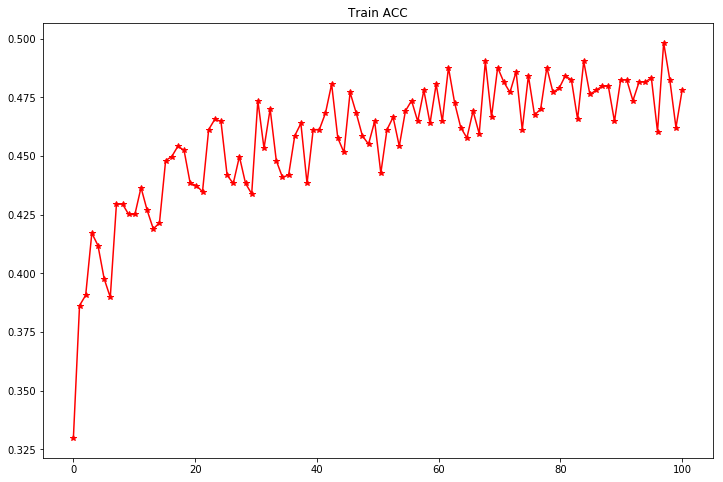

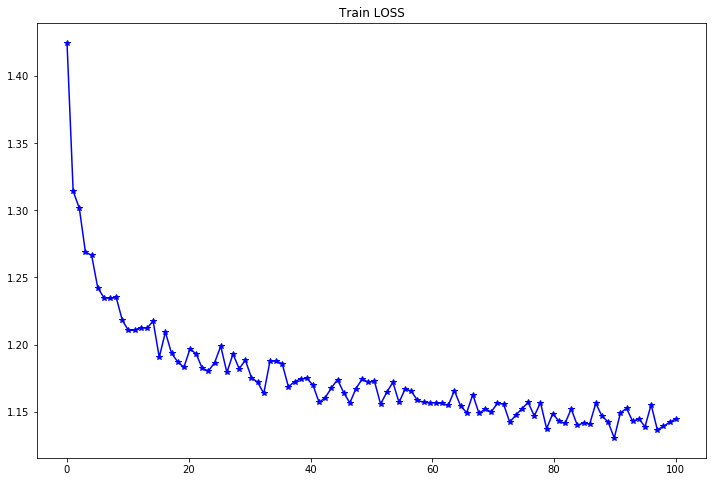

In [138]:
score = model.evaluate(test_X, test_y, batch_size=150)
print(score)
y_acc = history.history['acc']
x_acc = np.linspace(0, len(y_acc), len(y_acc))
plt.figure(figsize=(12,8))
plt.title('Train ACC')
plt.plot(x_acc, y_acc, 'r*-')
plt.show()
y_loss = history.history['loss']
x_loss = np.linspace(0, len(y_loss), len(y_loss))
plt.figure(figsize=(12,8))
plt.title('Train LOSS')
plt.plot(x_loss, y_loss,'b*-')
plt.show()

In [135]:
### Early stop Validation
# plt.figure(figsize=(12,4))
# plt.subplot(1,2,1)
# plot_train_history(history, 'loss','val_loss')
# plt.subplot(1,2,2)
# plot_train_history(history, 'acc','val_acc')

In [139]:
model.predict(test_X)

array([[0.334381  , 0.13161668, 0.19847952, 0.33552274],
       [0.3931721 , 0.08926021, 0.3041283 , 0.21343945],
       [0.30236647, 0.17181844, 0.28987956, 0.23593554],
       ...,
       [0.29175305, 0.29099032, 0.21026888, 0.20698774],
       [0.31753823, 0.08285166, 0.18591203, 0.41369808],
       [0.31183514, 0.09535255, 0.1753564 , 0.4174559 ]], dtype=float32)

In [140]:
model.predict(train_X)

array([[0.18994996, 0.38595843, 0.29014504, 0.13394657],
       [0.5007923 , 0.05653713, 0.1913594 , 0.25131115],
       [0.44983232, 0.03779883, 0.20200008, 0.31036872],
       ...,
       [0.288815  , 0.18869744, 0.2112816 , 0.31120595],
       [0.06484378, 0.7748897 , 0.08430586, 0.07596063],
       [0.24675436, 0.09113209, 0.3621535 , 0.29996002]], dtype=float32)

# Save Model (Keras NN model)

In [141]:
# Save Keras Model
model.save('save/NNModel.h5')


In [142]:
# Read Method -- Keras model
from keras.models import load_model
model_read = load_model('save/NNModel.h5')
score = model_read.evaluate(test_X, test_y, batch_size=200)
score

378/378 [==============================] - 1s 1ms/step


[1.1601176198828158, 0.4788359914507185]